In [7]:
import os 
import progressbar

from utils import aggregateParams

### Find Best Params

First find the best params

In [8]:
all_results, all_params_to_mse, all_mse_to_params, all_mse = aggregateParams("../experiments_20crossval_bp_every_gen/")

100% (120 of 120) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1 with mean mse 4604.15995, std mse 1257.4950484959531
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen2 with mean mse 5180.5432, std mse 1210.403553283719
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen8 with mean mse 5206.94805, std mse 1231.7692722103127
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen24 with mean mse 5280.33975, std mse 1274.0304865188098
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen4 with mean mse 5311.7082, std mse 1404.9944441585076
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen16 with mean mse 5355.71295, std mse 1250.3881050596997


### Analyse Simple GP Behaviour

Holding all other variables constant, lets see what affect the params have

In [9]:
from plot import calc_means_and_stds, errorbar_plot

In [10]:
all_params_to_mse

{'maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1': (4604.15995,
  1257.4950484959531),
 'maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen16': (5355.71295,
  1250.3881050596997),
 'maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen2': (5180.5432,
  1210.403553283719),
 'maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen24': (5280.33975,
  1274.0304865188098),
 'maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen4': (5311.7082,
  1404.9944441585076),
 'maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen8': (5206.94805,
  1231.7692722103127)}

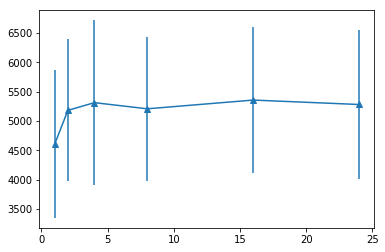

[(1, (4604.15995, 1257.4950484959531)),
 (2, (5180.5432, 1210.403553283719)),
 (4, (5311.7082, 1404.9944441585076)),
 (8, (5206.94805, 1231.7692722103127)),
 (16, (5355.71295, 1250.3881050596997)),
 (24, (5280.33975, 1274.0304865188098))]

In [13]:
#### Variation with population size

template_every_gen_f = "maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1_bpeverygen{}"
gens = [2, 4, 8, 16, 24]

values = []
values.append((1, all_params_to_mse["maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1"]))


values = values + calc_means_and_stds(template_every_gen_f, gens, all_params_to_mse)


errorbar_plot(values)

values